In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. British Windfarm

### 1.1. Load Datasets

In [2]:
# load data into pandas dataframe
turbine_one = pd.read_csv('../data/Kelmarsh_SCADA_2021_3087/Turbine_Data_Kelmarsh_1_2021-01-01_-_2021-07-01_228.csv', header=9)
turbine_two = pd.read_csv('../data/Kelmarsh_SCADA_2021_3087/Turbine_Data_Kelmarsh_2_2021-01-01_-_2021-07-01_229.csv', header=9)
turbine_three = pd.read_csv('../data/Kelmarsh_SCADA_2021_3087/Turbine_Data_Kelmarsh_3_2021-01-01_-_2021-07-01_230.csv', header=9)
turbine_four = pd.read_csv('../data/Kelmarsh_SCADA_2021_3087/Turbine_Data_Kelmarsh_4_2021-01-01_-_2021-07-01_231.csv', header=9)
turbine_five = pd.read_csv('../data/Kelmarsh_SCADA_2021_3087/Turbine_Data_Kelmarsh_5_2021-01-01_-_2021-07-01_232.csv', header=9)
turbine_six = pd.read_csv('../data/Kelmarsh_SCADA_2021_3087/Turbine_Data_Kelmarsh_6_2021-01-01_-_2021-07-01_233.csv', header=9)

In [3]:
# Extract only the first 28 columns, which contain the data we need
turbine_one = turbine_one.iloc[:, :28]
turbine_two = turbine_two.iloc[:, :28]
turbine_three = turbine_three.iloc[:, :28]
turbine_four = turbine_four.iloc[:, :28]
turbine_five = turbine_five.iloc[:, :28]
turbine_six = turbine_six.iloc[:, :28]

# since we have to perform the same operations on each turbine, we can create a list of the dataframes and iterate through them
turbine_list = [turbine_one, turbine_two, turbine_three, turbine_four, turbine_five, turbine_six]

# print the keys of the first turbine to see what columns we have
# print(turbine_one.keys())

# rename the '# Date and time' column to 'Date' for easier access, convert it to pd.datetime and set it as the index
for i, turbine in enumerate(turbine_list):
    turbine.rename(columns={'# Date and time': 'Date'}, inplace=True)
    turbine['Date'] = pd.to_datetime(turbine['Date'])
    turbine.set_index('Date', inplace=True)
    print(f"There exist {len(turbine)} data points for turbine {i+1}")

There exist 26064 data points for turbine 1
There exist 26064 data points for turbine 2
There exist 26064 data points for turbine 3
There exist 26064 data points for turbine 4
There exist 26064 data points for turbine 5
There exist 26064 data points for turbine 6


### 1.2. Cleaning Data

In [4]:
# delete all rows that contain NaN values
for i, turbine in enumerate(turbine_list):
    turbine.dropna(inplace=True)
    print(f"There exist {len(turbine)} data points for turbine {i+1} after removing NaN values")

There exist 23275 data points for turbine 1 after removing NaN values
There exist 23229 data points for turbine 2 after removing NaN values
There exist 23236 data points for turbine 3 after removing NaN values
There exist 23188 data points for turbine 4 after removing NaN values
There exist 23177 data points for turbine 5 after removing NaN values
There exist 23324 data points for turbine 6 after removing NaN values


In [5]:
# check for duplicates
for i, turbine in enumerate(turbine_list):
    print(f"There exist {len(turbine[turbine.duplicated()])} duplicated rows in turbine{i+1}")

There exist 0 duplicated rows in turbine1
There exist 0 duplicated rows in turbine2
There exist 0 duplicated rows in turbine3
There exist 0 duplicated rows in turbine4
There exist 0 duplicated rows in turbine5
There exist 0 duplicated rows in turbine6


In [6]:
turbine_one.head()
print(turbine_one.keys())

Index(['Wind speed (m/s)', 'Wind speed, Standard deviation (m/s)',
       'Wind speed, Minimum (m/s)', 'Wind speed, Maximum (m/s)',
       'Long Term Wind (m/s)', 'Wind speed Sensor 1 (m/s)',
       'Wind speed Sensor 1, Standard deviation (m/s)',
       'Wind speed Sensor 1, Minimum (m/s)',
       'Wind speed Sensor 1, Maximum (m/s)', 'Wind speed Sensor 2 (m/s)',
       'Wind speed Sensor 2, Standard deviation (m/s)',
       'Wind speed Sensor 2, Minimum (m/s)',
       'Wind speed Sensor 2, Maximum (m/s)',
       'Density adjusted wind speed (m/s)', 'Wind direction (°)',
       'Nacelle position (°)', 'Wind direction, Standard deviation (°)',
       'Wind direction, Minimum (°)', 'Wind direction, Maximum (°)',
       'Nacelle position, Standard deviation (°)',
       'Nacelle position, Minimum (°)', 'Nacelle position, Maximum (°)',
       'Vane position 1+2 (°)', 'Vane position 1+2, Max (°)',
       'Vane position 1+2, Min (°)', 'Vane position 1+2, StdDev (°)',
       'Energy Export (

### 1.3. Plot Energy Exported and Wind Speed

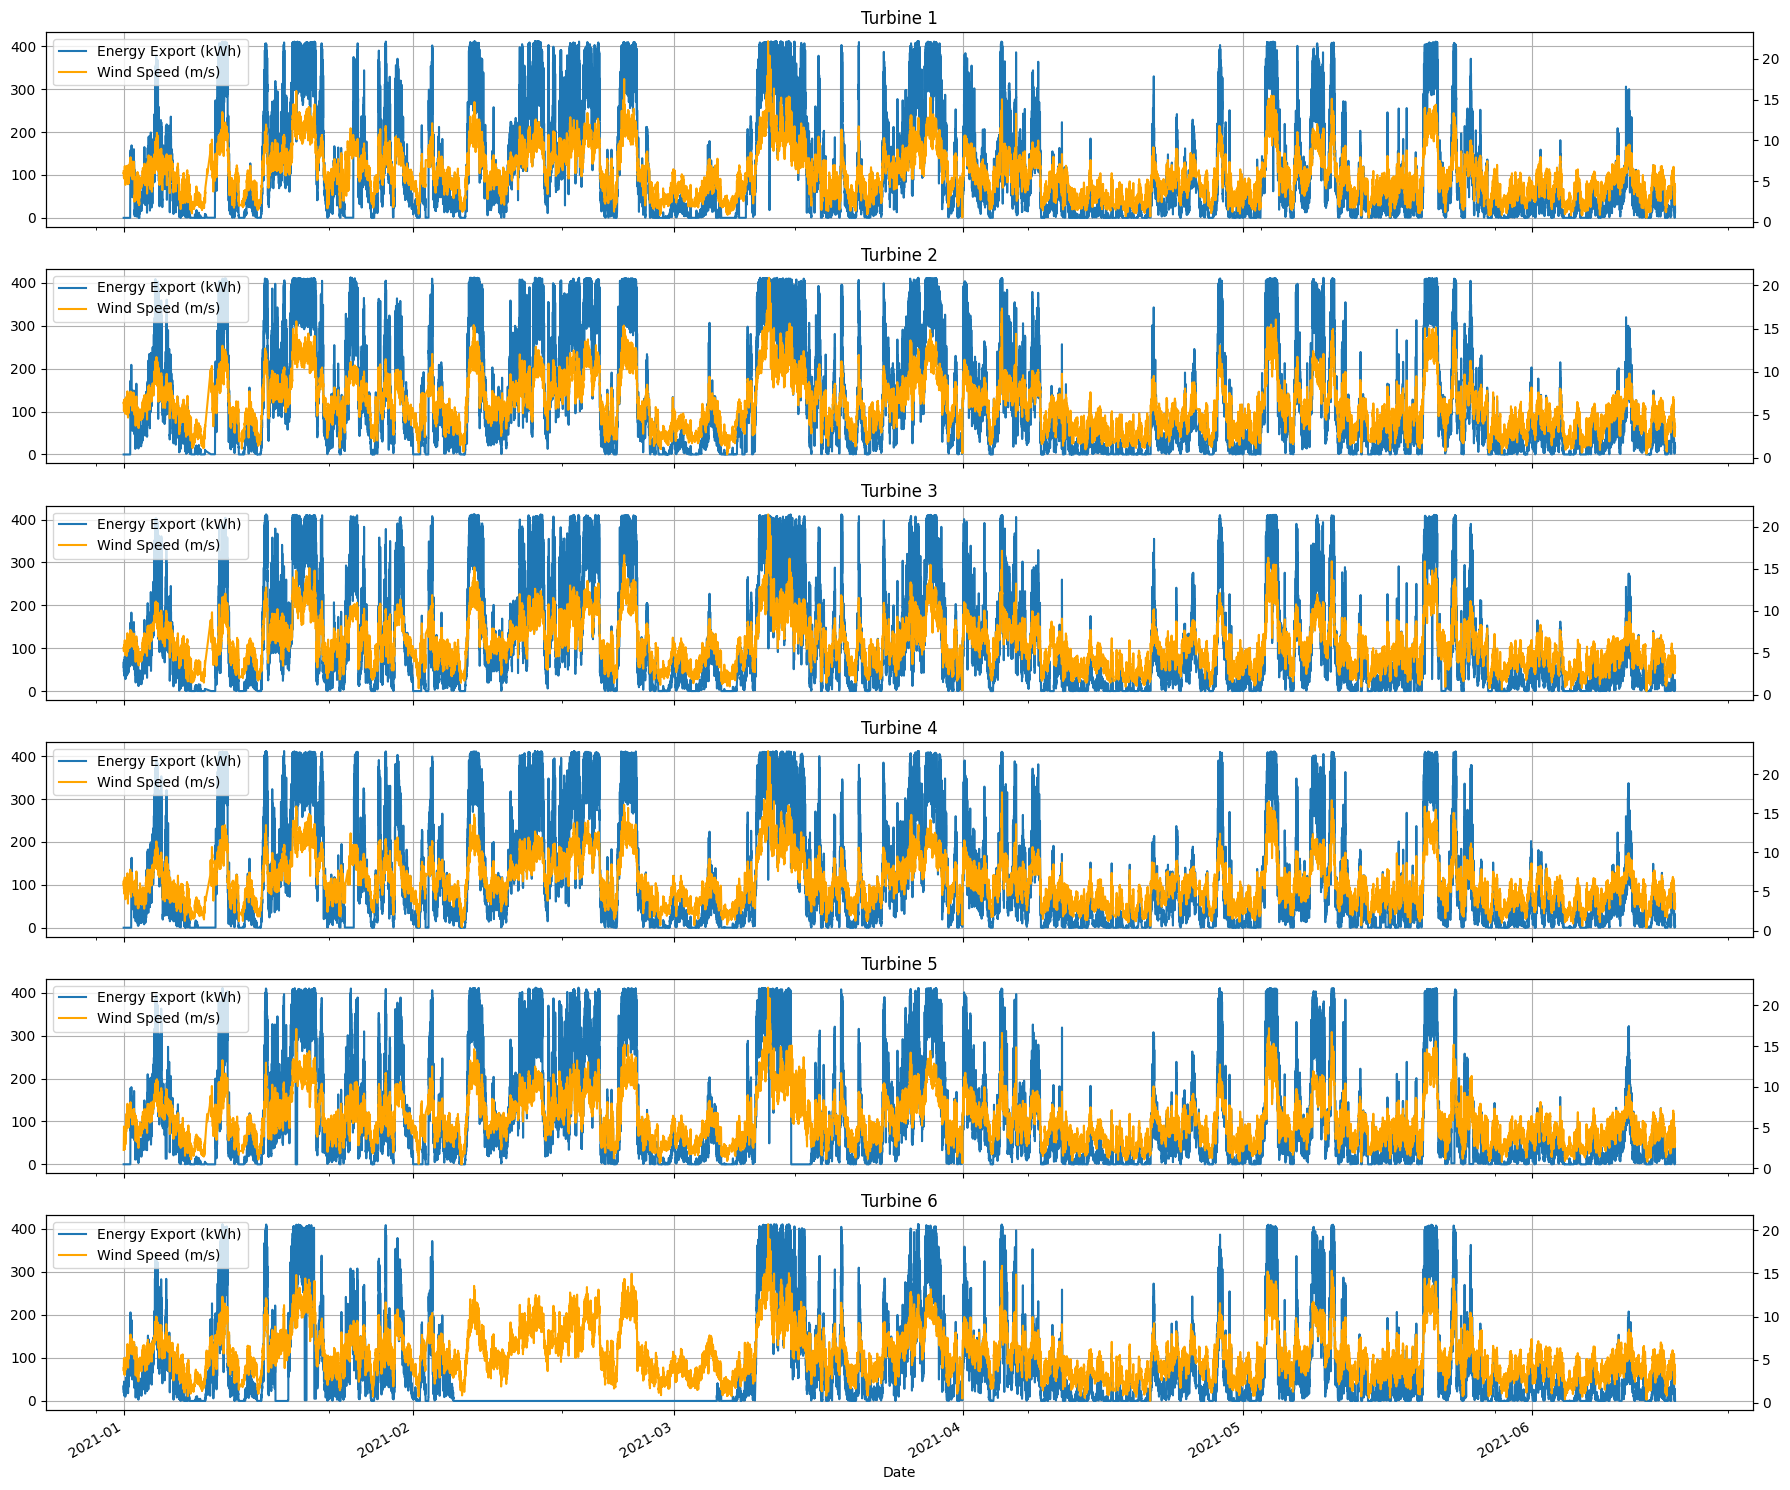

In [10]:
# We start with plotting variables and look for visually correlations
# That there is a correlation between the power output and the wind speed seems logical. Thus we start with them:
# To keep things simple, we only look at a time period of two months

start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2022-01-01')


fig, axs = plt.subplots(6, 1, figsize=(18, 15), sharex=True)

for i, turbine in enumerate(turbine_list):
    turbine[start_date:end_date].plot(y='Energy Export (kWh)', ax=axs[i], title=f'Turbine {i+1}', label='Energy Export (kWh)', legend=False)
    axs[i].grid()
    ax2 = axs[i].twinx()
    turbine[start_date:end_date].plot(y='Wind speed (m/s)', ax=ax2, color='orange', label='Wind Speed (m/s)', legend=False)
    lines = [axs[i].get_lines()[0], ax2.get_lines()[0]]
    axs[i].legend(lines, [line.get_label() for line in lines], loc='upper left')

fig.tight_layout()
plt.show()

**Analysis of the Plot above:**
1. We see a clear correlation between the two variables through time.
2. It is possible that there is no energy exportet altough there would be sufficient wind to do so. Maybe there were some repair issues for turbine 6 at the end of the considered time period. Those data points could make training more difficult, since this seems to be a non-regular behaviour.

In [8]:
# Another interesting variable is the wind direction. We can plot it as a polar plot



### 1.4. Boxplot
Next we create boxplots for the respective variables to gain further insights.

In [9]:
# 

# 2. Brazilian Windfarm

# 3. Brainstorming Models 

1. (S)ARIMA
2. Exponential Smoothing
3. Gradient Boosting Machines
4. LSTMs
5. Prophet (Facebook)
6. Gaussian Processes
7. ODEs / PDEs

### 4. VARIMA model

In [13]:
# extract wind direction and wind speed and energy export for turbine 1

turbine_one_varima = turbine_one[['Wind direction (°)', 'Wind speed (m/s)', 'Energy Export (kWh)']]
turbine_one_varima.head()

,Wind direction (°),Wind speed (m/s),Energy Export (kWh)
Date,,,
2021-01-01 00:00:00,304.833128,6.204656,0.0
2021-01-01 00:10:00,299.338570,5.858888,0.0
2021-01-01 00:20:00,299.172669,6.069038,0.0
2021-01-01 00:30:00,296.647785,5.918869,0.0
2021-01-01 00:40:00,291.827335,5.408306,0.0


In [14]:
# divide the data set into training (80 %) and test set (20 %)
train_set = turbine_one_varima[:int(0.8*(len(turbine_one_varima)))]
test_set = turbine_one_varima[int(0.8*(len(turbine_one_varima))):]

In [15]:
# necessary imports 
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [16]:
# it is necessary to check if the data is stationary. We can do this by using the Augmented Dickey-Fuller test
# if the p-value is smaller than 0.05, the data is stationary
# if the p-value is larger than 0.05, the data is not stationary

def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

In [17]:
# check stationarity of wind speed
check_stationarity(turbine_one_varima['Wind speed (m/s)'])

ADF Statistic: -9.013029087456328
p-value: 6.053522123216525e-15
Critical Values:
1%: -3.430631218693631
5%: -2.861664289737469
10%: -2.5668361558645527


In [18]:
# check stationarity of wind direction
check_stationarity(turbine_one_varima['Wind direction (°)'])

ADF Statistic: -9.266218534913362
p-value: 1.364734374858616e-15
Critical Values:
1%: -3.4306313759989226
5%: -2.8616643592581203
10%: -2.5668361928689754


In [19]:
# check stationarity of energy export
check_stationarity(turbine_one_varima['Energy Export (kWh)'])

ADF Statistic: -8.195997990175757
p-value: 7.446840527549384e-13
Critical Values:
1%: -3.4306315456015497
5%: -2.861664434213542
10%: -2.566836232766216


In [20]:
# build a VARMAX model, fit it to the training data and predict the test data
model = VARMAX(train_set, order=(1, 1))
res = model.fit(maxiter=1000, disp=False)

/opt/miniconda3/envs/res_env/lib/python3.10/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/opt/miniconda3/envs/res_env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
